# ML Lista 2: Jan Pawłowski
Na tej liście rozwiązywany jest problem cvrp (Capacitated Vehicle Routing Problem).
Wszystkie badania przeprowadziłem dla tego problemu.

## Szybki opis zawartości repozytorium

Kod źrółowy znajduje się w module `src`, a testy do niego w folderze `test`.
Obliczenia są prekompilowane z użyciem biblioteki `numba`, która wielokrotnie przyśpiesza obliczenia oraz zrównolegla je.
Chciałem przetestować możliwości tej biblioteki, stąd wybór języka python, nad przykładowo c++.

Testowane podejście jest podejściem "trochę zachłannym", to znaczy algorytm wstawia jeden zjazd do magazynu, a pozostałe zjazdy do magazynu są wstawiane automatycznie przy ewaluacji.
Impelmentacja ta jest taka, a nie inna, aby móc używać kodu do rozwiązywania problemu TSP - wystarczy ustawić zapotrzebowanie wszystkich miast na zero, i problem sprowadza się dokładnie do TSP.

Zaimplementowane operatory krzyżowania znajdujące się w module `src.ga.cross` to `Cycle Crossover (cx)`, `Order Crossover (ox)` oraz `Partially-mapped crossover  (pmx)`

Używana jest jedna mutacja, która odwraca losowo wybrany podciąg genów, zaimplementowana w `src.ga.mutation`.

Selekcja turniejowa zaimplementowana jest w `src.ga.tournament`.

Reprezentacja populacji oraz kod związany z liczeniem fitness znajduje się w `src.cvrp_population`.

## Test na przykładowych danych

iteration 99: fitness: 265.2537536621094: 100%|██████████| 100/100 [00:00<00:00, 139.66it/s]


<AxesSubplot:xlabel='iteration', ylabel='fitness'>

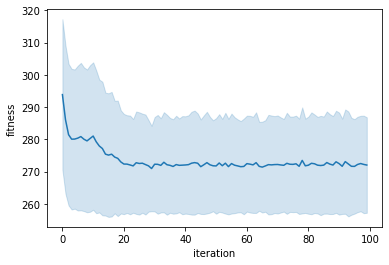

In [29]:
from configs import CONFIGS_ROOT
from src.config import Config
import seaborn as sns

from src.ga.ga import run_ga
from src.greedy_solution import run_greedy
from src.random_solution import run_random

Config.from_path(CONFIGS_ROOT / "simple.vrp")
population, history = run_ga(population_size=1000, num_iterations=100, tournament_size=5, cross_probability=0.7, mutation_probability=0.1)
sns.lineplot(data=history, x="iteration", y="fitness", ci='sd')

## Test na prawdziwych danych

Test na prawdziwych danych jest przeprowadzany na problemie `tai385`

iteration 1999: fitness: 42144.1953125: 100%|██████████| 2000/2000 [00:47<00:00, 42.04it/s] 


<AxesSubplot:xlabel='iteration', ylabel='fitness'>

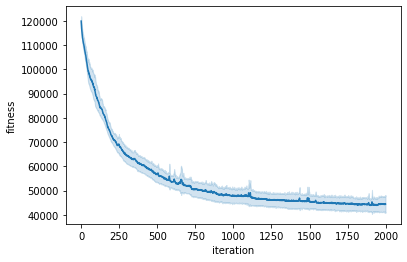

In [45]:
Config.from_path(CONFIGS_ROOT / "tai385.vrp")

_, history = run_ga(population_size=1000, num_iterations=2000, tournament_size=5, cross_probability=0.7, mutation_probability=0.1)
sns.lineplot(data=history, x="iteration", y="fitness", ci='sd')

## Testy wpływu szansy mutacji/krzyżowania na wyniki

Przetestowane zostało kilka par wartości `cross_probability` oraz `mutation_probability`

Można zaobserwować, że zwiększanie szansy na mutację oraz krzyżowanie przyśpiesza początkowe zmniejszanie wartości `fitness` function.
Zbyt mała wartość `cross_probability` powoduje wolne mniejszanie się `fitnessu`.
Po wykonaniu `3000` iteracji różnica zmniejsza się i najlepsze (nieznacznie) wyniki daje kombinacja stosunkowo małych szans na mutacje oraz krzyżowanie.
Im większa populacja, tym mniejszą rolę powinna odgrywać mutacja, a ważniejsze jest krzyżowanie.

Wartości skrajnie duże i małe są oczywiście niepożądane dla krzyżowania. Zbyt duże wartości mutacji również nie są pożądane.

Ponieważ duże prawdopodobieństwa zwracają wciąż przyzwoite wyniki, ale robią to znacznie szybciej, to dalsze testy używają dużych prawdopodobieństw na mutację oraz krzyżowanie.

iteration 2999: fitness: 44758.59375: 100%|██████████| 3000/3000 [01:18<00:00, 38.29it/s]   


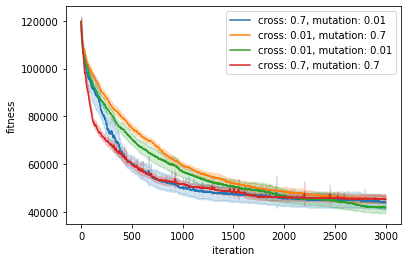

In [25]:
def run_and_plot_test_for_probabilites(cross_probability, mutation_probability):
    _, history = run_ga(population_size=1000, num_iterations=3000, tournament_size=5, cross_probability=cross_probability, mutation_probability=mutation_probability)
    sns.lineplot(data=history, x="iteration", y="fitness", ci='sd', label=f"cross: {cross_probability}, mutation: {mutation_probability}")


run_and_plot_test_for_probabilites(cross_probability=0.7, mutation_probability=0.01)
run_and_plot_test_for_probabilites(cross_probability=0.01, mutation_probability=0.7)
run_and_plot_test_for_probabilites(cross_probability=0.01, mutation_probability=0.01)
run_and_plot_test_for_probabilites(cross_probability=0.7, mutation_probability=0.7)

## Test rozmiaru turnieju

Rozmiar turnieju jest bardzo mały to jego wynik jest praktycznie losowy, więc nie uczy się, co jest oczekiwane.
Poza tym rozmiar turnieju ma stosunkowo niewielki wpływ na proces uczenia.

iteration 1499: fitness: 44185.73046875: 100%|██████████| 1500/1500 [00:35<00:00, 42.35it/s]


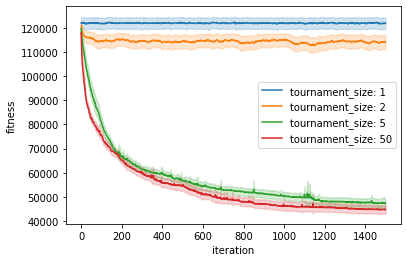

In [27]:
def run_and_plot_test_for_tournament_size(tournament_size):
    _, history = run_ga(population_size=1000, num_iterations=1500, tournament_size=tournament_size, cross_probability=0.7, mutation_probability=0.7)
    sns.lineplot(data=history, x="iteration", y="fitness", ci='sd', label=f"tournament_size: {tournament_size}")


run_and_plot_test_for_tournament_size(tournament_size=1)
run_and_plot_test_for_tournament_size(tournament_size=2)
run_and_plot_test_for_tournament_size(tournament_size=5)
run_and_plot_test_for_tournament_size(tournament_size=50)

## Test rozmiaru populacji

Zwiększanie rozmiaru populacji pomaga poprawić wyniki, większa populacja daje zauważalnie lepsze wyniki, jednak jest to obarczone liniowym przyrostem czasu obliczeń.
Zbyt mała populacja da złe wyniki, a zbyt duża będzie się liczyć niepotrzebnie długo.

iteration 1499: fitness: 44296.6875: 100%|██████████| 1500/1500 [01:16<00:00, 19.68it/s]    


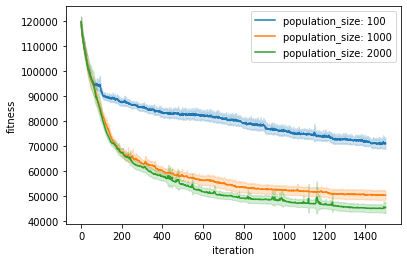

In [28]:
def run_and_plot_test_for_population_size(population_size):
    _, history = run_ga(population_size=population_size, num_iterations=1500, tournament_size=5, cross_probability=0.7, mutation_probability=0.7)
    sns.lineplot(data=history, x="iteration", y="fitness", ci='sd', label=f"population_size: {population_size}")


run_and_plot_test_for_population_size(population_size=100)
run_and_plot_test_for_population_size(population_size=1000)
run_and_plot_test_for_population_size(population_size=2000)

## Wnioski odnośnie liczby pokoleń

Liczba pokoleń oczywiście bardzo mocno wpływa na wyniki GA.
Uczenie z czasem zwalnia i zaczyna zbiegać do pewnej wartości.
W takiej sytuacji dalsze uczenie nie ma sensu.

## AG kontra Greedy kontra Random dla cvrp

Alorytm greedy radzi sobie zaskakująco dobrze w rozwiązywaniu tego problemu, nie daje on jednak tak dobrych wyników jak działający przez około minutę AG
Z racji na to, że rozwiązywany jest problem CVRP to algorytm greedy zawsze startuje z magazynu, stąd jest uruchomiony jedynie raz.
Wynik algorytmu random to uśredniane wyniki 100 uruchomień.

iteration 2999: fitness: 41539.0703125: 100%|██████████| 3000/3000 [00:49<00:00, 61.08it/s] 


[Text(0, 0, '41539.1'), Text(0, 0, '43129.9'), Text(0, 0, '122111')]

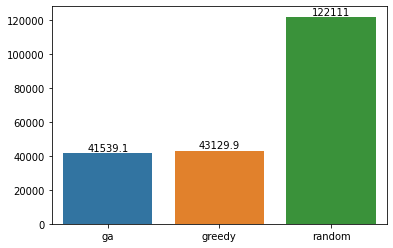

In [50]:
ga_population, _ = run_ga(population_size=1000, num_iterations=3000, tournament_size=50, cross_probability=0.01, mutation_probability=0.01)
_, ga_best_fitness = ga_population.get_best_genome_and_fitness()

greedy_population = run_greedy()
_, greedy_best_fitness = greedy_population.get_best_genome_and_fitness()

random_best_fitness = sum(run_random().get_best_genome_and_fitness()[1] for _ in range(100)) / 100

ax = sns.barplot(x=["ga", "greedy", "random"], y=[ga_best_fitness, greedy_best_fitness, random_best_fitness])
ax.bar_label(ax.containers[0])